In [1]:
import tiktoken


# Load the cl100k_base tokenizer which is designed to work with the ada-002 model.
tokenizer = tiktoken.get_encoding("cl100k_base")

In [2]:
import pandas as pd


texts = [
    ["Article 1", "This is a test. Kiwi kiwi, soup, stake, pork."], 
    ["Article 2", "This is another kiwi. Kiwi, soup, stake, pork."]
]

df = pd.DataFrame(texts, columns=['article_name', 'text'])

df.head()

,article_name,text
0,Article 1,"This is a test. Kiwi kiwi, soup, stake, pork."
1,Article 2,"This is another kiwi. Kiwi, soup, stake, pork."


In [3]:
# Tokenize the text and save the number of tokens to a new column.
df["token_ids"] = df.text.apply(lambda x: tokenizer.encode(x))
df["n_tokens"] = df.text.apply(lambda x: len(tokenizer.encode(x)))

df.head()

,article_name,text,token_ids,n_tokens
0,Article 1,"This is a test. Kiwi kiwi, soup, stake, pork.","[2028, 374, 264, 1296, 13, 30558, 17043, 20548...",16
1,Article 2,"This is another kiwi. Kiwi, soup, stake, pork.","[2028, 374, 2500, 20548, 17043, 13, 30558, 170...",15


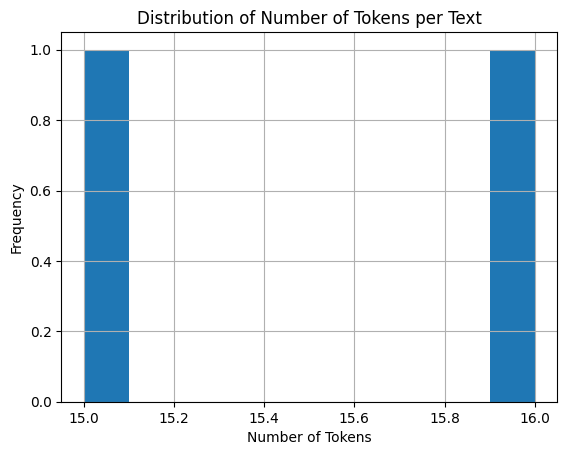

In [4]:
import matplotlib.pyplot as plt


# Tokenize the text and save the number of tokens to a new column
df['n_tokens'] = df.text.apply(lambda x: len(tokenizer.encode(x)))

# Visualize the distribution of the number of tokens per row using a histogram
df.n_tokens.hist()
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Tokens per Text')
plt.show()

In [5]:
from typing import List


def split_into_many(text: str, max_tokens: int) -> List[str]:
    """
    Split the text into chunks of a maximum number of tokens.
    
    Parameters:
    text (str): The text to be split into chunks.
    max_tokens (int): The maximum number of tokens allowed in each chunk.
    
    Returns:
    List[str]: A list of text chunks.
    """
    
    # Split the text into sentences.
    sentences = text.split(". ")
    
    # Get the number of tokens for each sentence.
    n_tokens = [len(tokenizer.encode(" " + sentence)) for sentence in sentences]
    
    chunks = []
    tokens_so_far = 0
    chunk = []
    
    # Loop through the sentences and tokens joined together in a tuple.
    for sentence, token in zip(sentences, n_tokens):
        
        # Check if adding a new sentence exceeds the maximum token limit.
        if tokens_so_far + token > max_tokens:
            chunks.append(". ".join(chunk) + ".")
            chunk = []
            tokens_so_far = 0
        
        # Add sentences that don't exceed the token limit to the current chunk.
        chunk.append(sentence)
        tokens_so_far += token + 1
    
    # Return the list of text chunks.
    return chunks


def shorted_texts_of_df(df, max_tokens: int) -> List[str]:
    """
    Process a DataFrame to shorten the texts based on a maximum token limit.
    
    Parameters:
    df (DataFrame): The DataFrame containing the texts to be shortened.
    
    Returns:
    List[str]: A list of shortened texts.
    """
    
    shortened_texts = []
    
    # Loop through the DataFrame.
    for _, row in df.iterrows():
        
        text = row['text']
        
        # Skip rows where the text is None.
        if text is None:
            continue
        
        # Split the text into chunks if it exceeds the maximum token count.
        if len(tokenizer.encode(text)) > max_tokens:
            shortened_texts.extend(split_into_many(text, max_tokens))
        else:
            shortened_texts.append(text)
    
    return shortened_texts


['This is a test.', 'This is another kiwi. Kiwi, soup, stake, pork.']


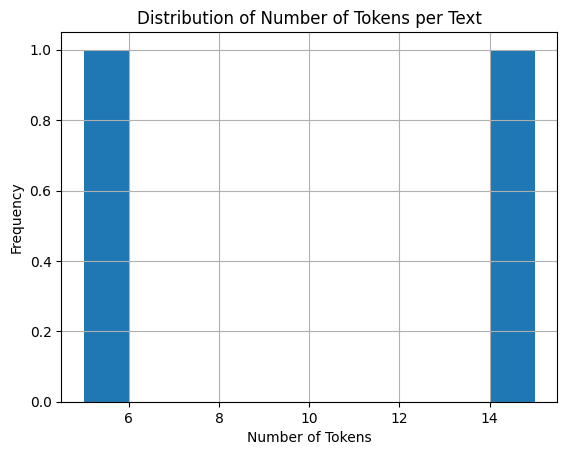

In [6]:
shortened_texts = shorted_texts_of_df(df, 15)
print(shortened_texts)

df = pd.DataFrame(shortened_texts, columns=['text'])
df['n_tokens'] = df.text.apply(lambda x: len(tokenizer.encode(x)))

df.n_tokens.hist()
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Tokens per Text')
plt.show()

In [7]:
df["text"] = df.text.apply(lambda x: tokenizer.encode(x))
df.head()

,text,n_tokens
0,"[2028, 374, 264, 1296, 13]",5
1,"[2028, 374, 2500, 20548, 17043, 13, 30558, 170...",15


In [9]:
sample_text = "Fact-based news, exclusive video footage, photos and updated maps."
sample_tokens = tokenizer.encode(sample_text)
print(sample_tokens)

[17873, 6108, 3754, 11, 14079, 2835, 22609, 11, 7397, 323, 6177, 14370, 13]
